# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Dataset Fields</div>
> - **Fixed Acidity**: Fixed acidity corresponds to the set of low volatility organic acids such as malic, lactic, tartaric or citric acids and is inherent to the characteristics of the sample.
> - **Volatile Acidity**: Volatile acidity is an important sensory parameter, with higher levels indicating wine spoilage.
> - **Citric Acid**: Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a *fresh* flavor.
> - **Residual Sugar**: Residual Sugar is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes.
> - **Chlorides**: They are a major contributor to the *saltiness* of a wine.
> - **Free Sulfur Dioxide**: Sulfur dioxide (SO<sub>2</sub>) preserves wine, preventing oxidation and browning.
> - **Total Sulfur Dioxide**: Total Sulfur Dioxide (TSO<sub>2</sub>) is the portion of SO<sub>2</sub> that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars.
> - **Density**: Holding alcohol level constant, density has little effect on the quality of wines as other keys can contribute in density.
> - **pH**: Winemakers use pH as a way to measure ripeness in relation to acidity. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth.
> - **Sulphates**: The presence of another type of sulpate, is thought to help rid the wine of a wide variety of bacteria (good and bad). This seems to lower the wine quality as well because it dulls the wine's fermentation process.
> - **Alcohol**: Alcohol content affects a wine's body, since alcohol is more viscous than water. A wine with higher alcohol content will have a fuller, richer body, while a lower alcohol wine will taste lighter and more delicate on the palate.
> - **Quality**: Wine quality mainly depends on the vinification process and the geographical origin of the grapes but also highly relies on the varietal composition of the grape.

# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Imports</div>


In [ ]:
!pip3 install catboost

In [ ]:
!pip install optuna

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg
import seaborn as sns
import catboost

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

from catboost import CatBoostClassifier

from xgboost import XGBClassifier

import lightgbm as lgbm

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import optuna

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

### Setting a color scheme

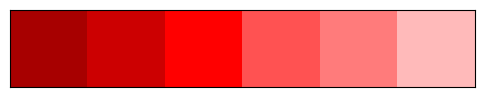

In [ ]:
custom_colors = ['#A70000', '#CC0001', '#FF0000', '#FF5252', '#FF7B7B', '#FFBABA']
custom_palette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors), size = 1)
plt.tick_params(axis = 'both', labelsize = 0, length = 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the data

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Taking a look at the missing values of the dataset

In [ ]:
print(df.isna().sum())
print('================================')
print('Total Missing Values = {}'.format(df.isna().sum().sum()))
print('================================')

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total Missing Values = 0


# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Exploratory Data Analysis (EDA)</div>


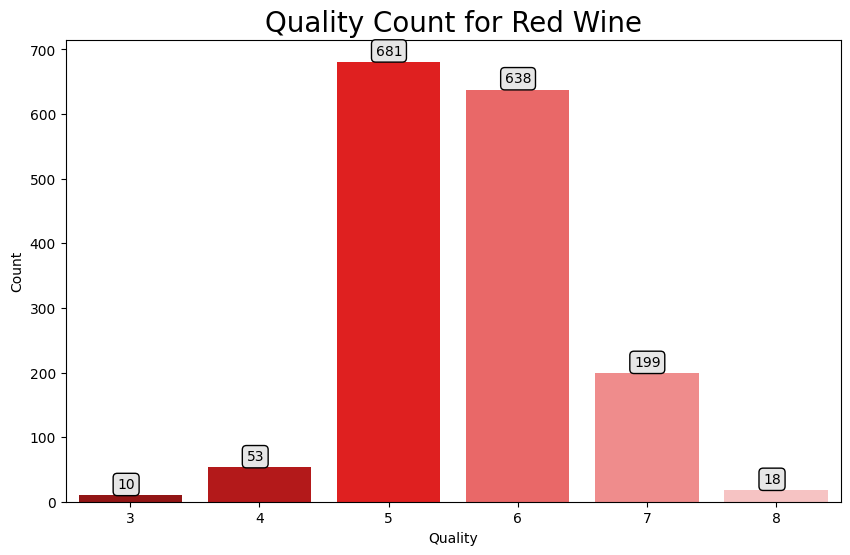

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(data = df, x = 'quality', palette = [custom_colors[0], custom_colors[1], custom_colors[2], custom_colors[3], custom_colors[4], custom_colors[5]])


bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 10.5),
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 10)

plt.title('Quality Count for Red Wine', fontsize = 20)
plt.xlabel('Quality', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

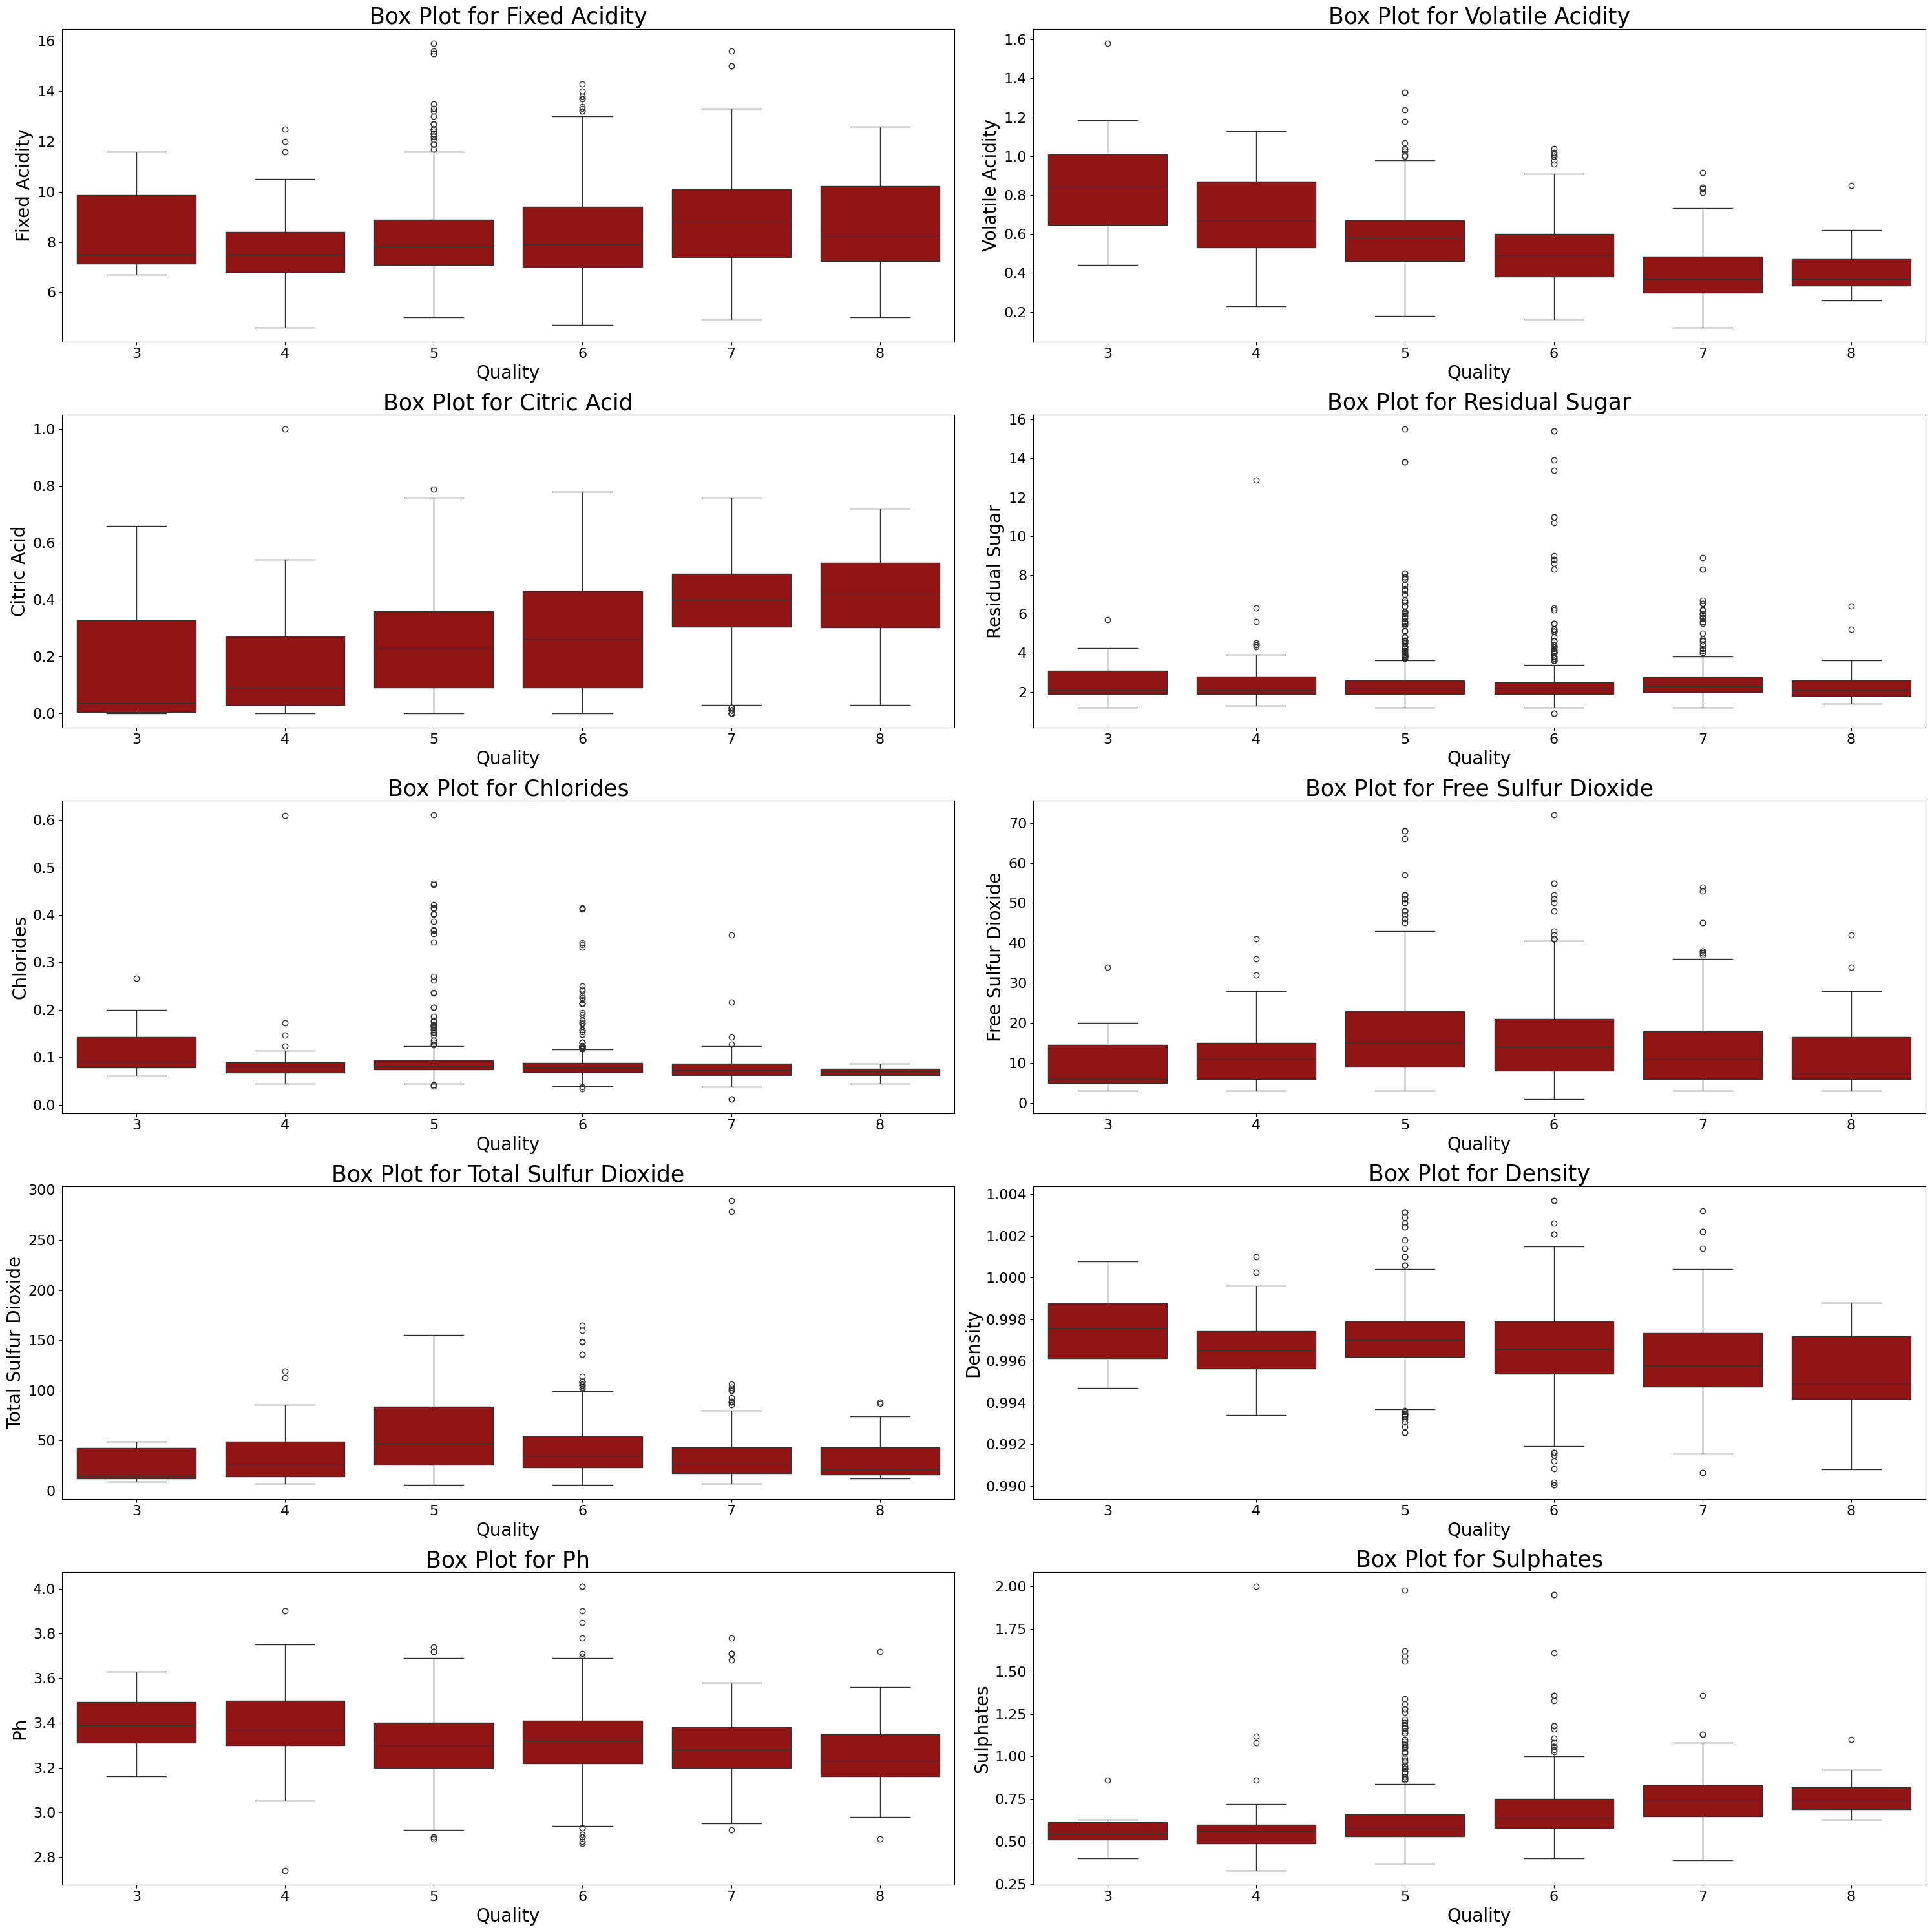

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 30))

def create_boxplot(ax, feature):
    sns.boxplot(data=df, x=df['quality'], y=feature, ax=ax)
    ax.set_title('Box Plot for ' + feature.title(), fontsize=25)
    ax.set_xlabel('Quality', fontsize=20)
    ax.set_ylabel(feature.title(), fontsize=20)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

# Create subplots
for i, feature in enumerate(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                             'pH', 'sulphates']):
    ax = plt.subplot(5, 2, i+1)
    create_boxplot(ax, feature)

plt.tight_layout()
plt.show()



# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Checking for Correlation</div>

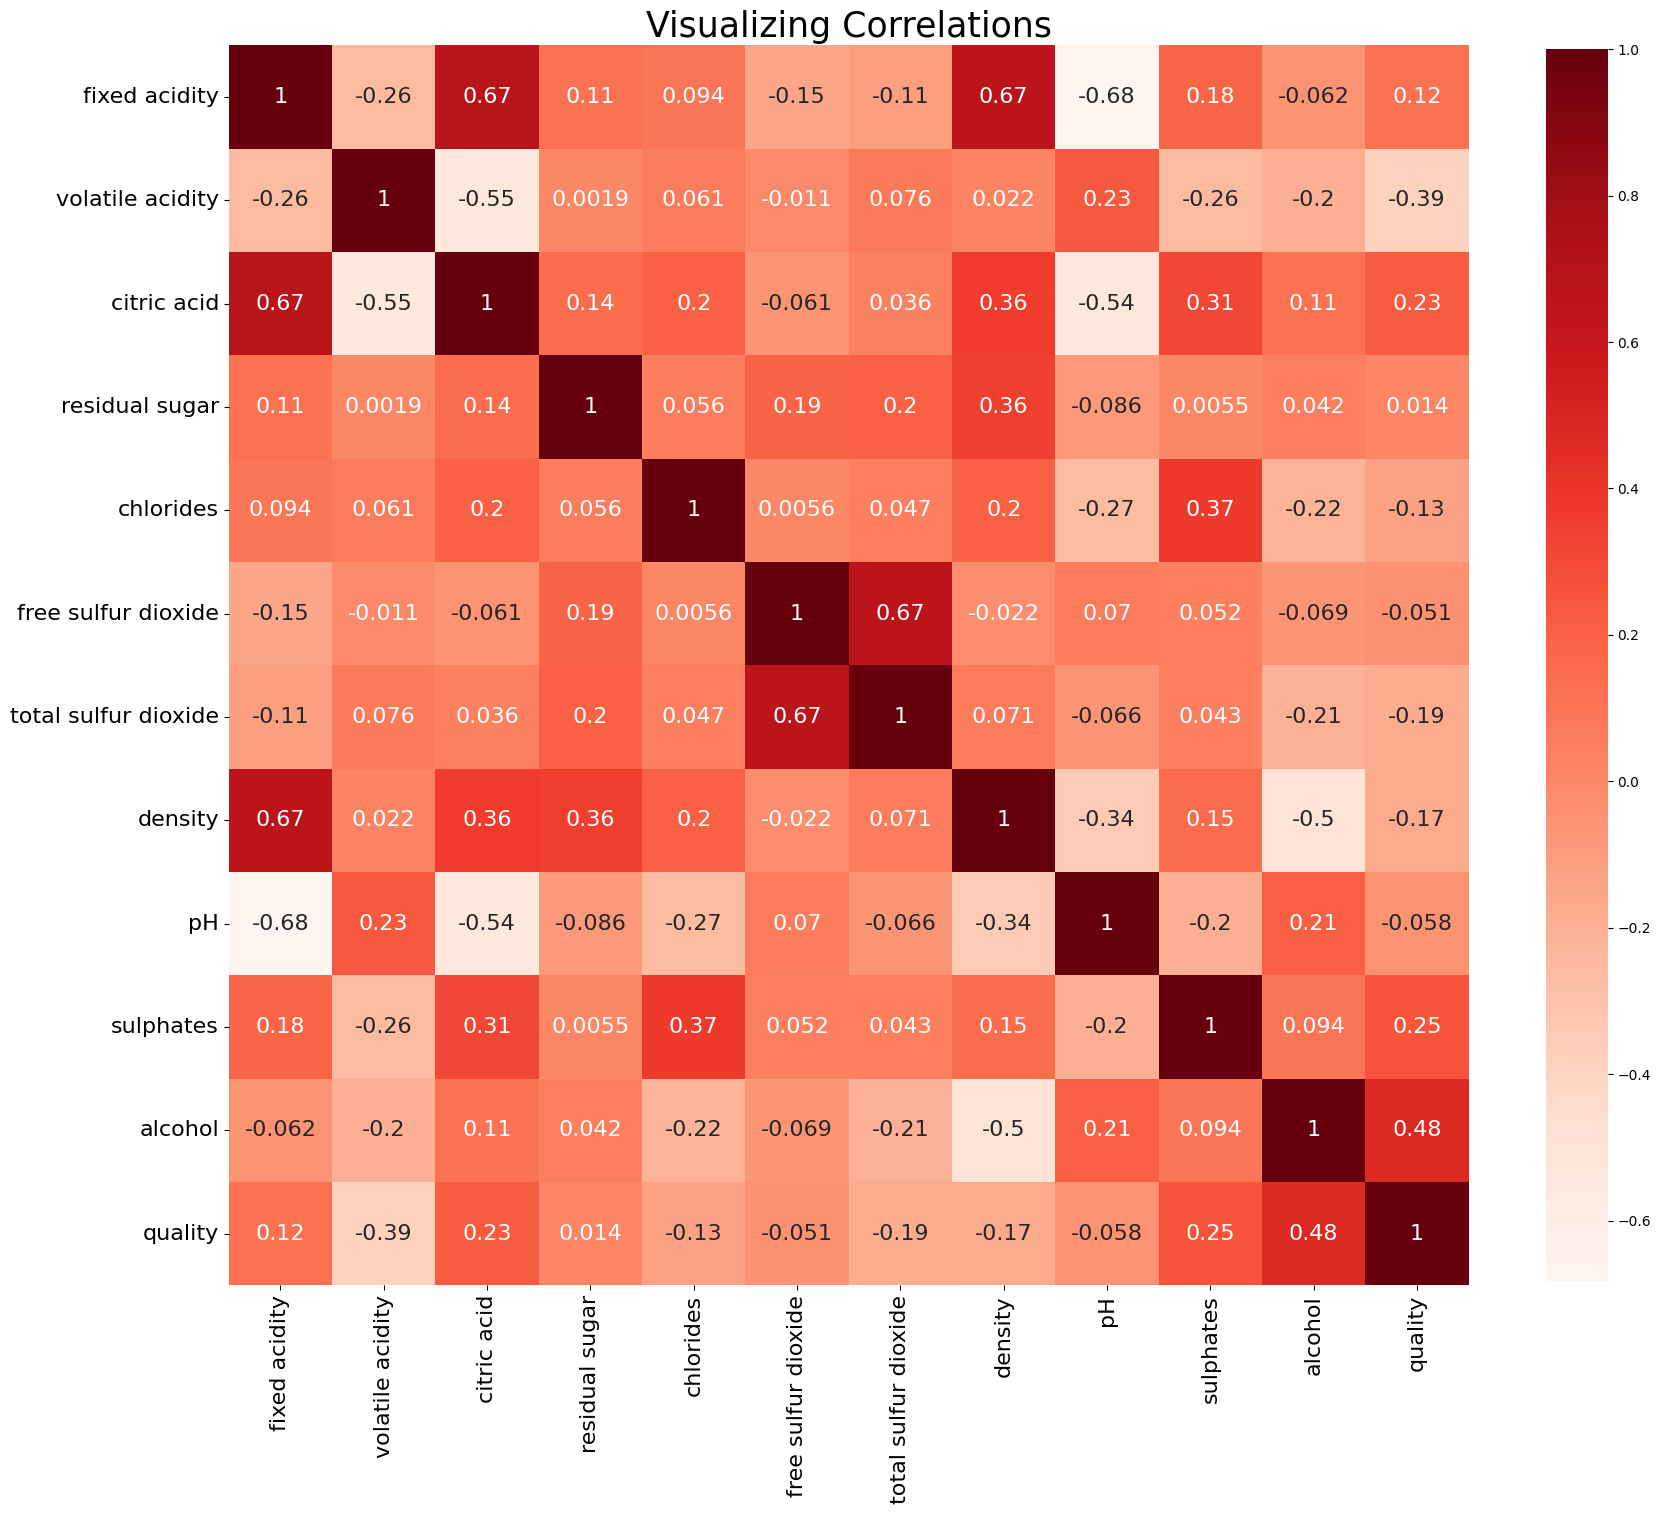

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), cmap = 'Reds', square = True, annot = True, annot_kws = {'size': 16},
           cbar_kws = {'shrink': 0.80})
plt.title("Visualizing Correlations", size = 25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

To correct the **class imbalance** in the dataset, we make use of binning. We divide the dataset into `bad` and `good` quality wine, such that the number of samples for **bad** quality wine is almost equal to the number of samples for good quality wine.

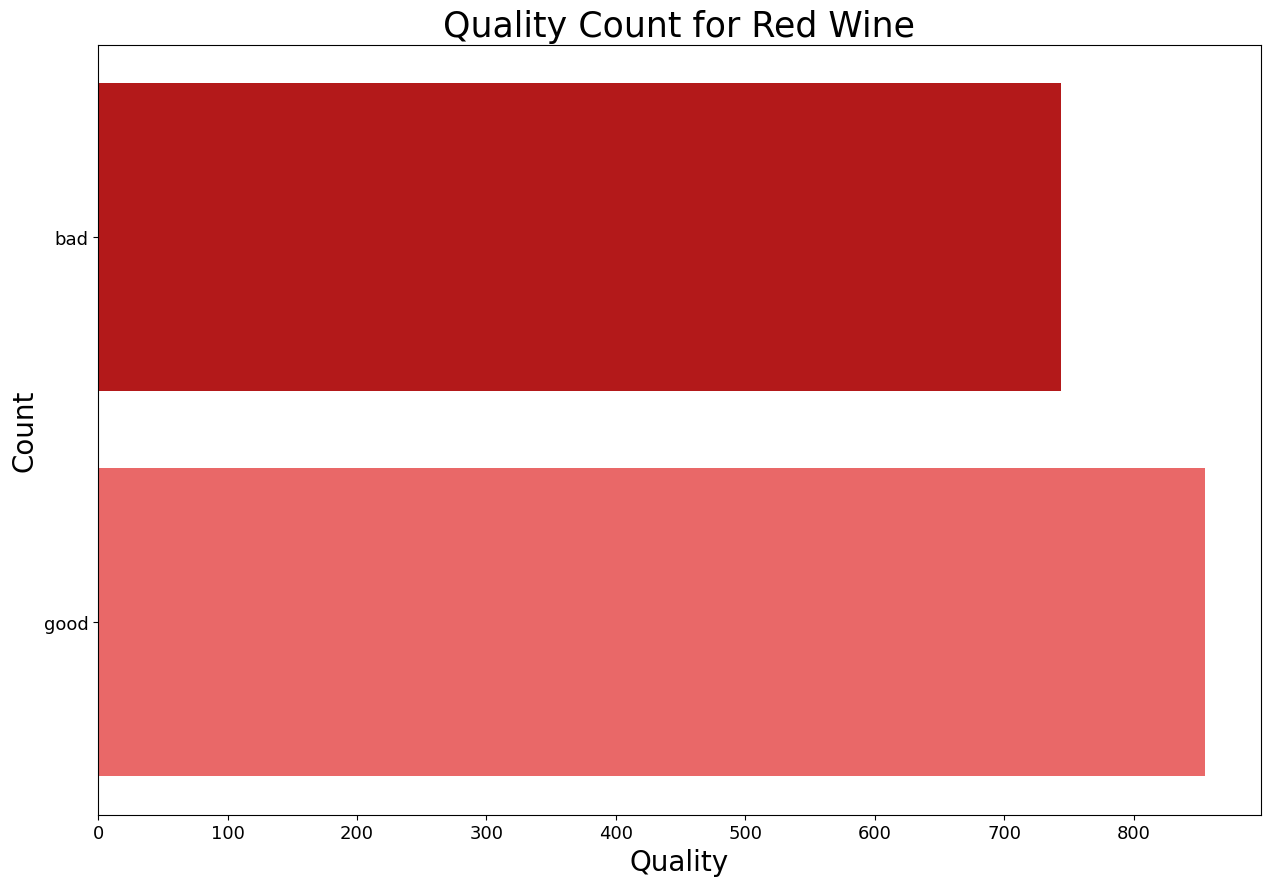

In [ ]:
df['quality'] = pd.cut(df['quality'], bins = [1, 5, 10], labels = ['bad', 'good'])

plt.figure(figsize = (15, 10))
ax = sns.countplot(df['quality'], palette = [custom_colors[1], custom_colors[-3]])
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(df['quality'])) * 100), (p.get_x() + 0.3, p.get_height() + 13),
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 15)

plt.title('Quality Count for Red Wine', fontsize = 25)
plt.xlabel('Quality', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Encoding the Labels</div>

In [ ]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Scaling the Data</div>


In [ ]:
scaler = StandardScaler()
features = [features for features in df.columns if df[features].dtype != int]
df[features] = scaler.fit_transform(df[features])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,1
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,1
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0


In [ ]:
X = df.drop('quality', axis = 1)
y = df['quality']
print(X, '\n\n\n', y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1         -0.298547          1.967442    -1.391472        0.043416   0.223875   
2         -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3          1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4         -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
...             ...               ...          ...             ...        ...   
1594      -1.217796          0.403229    -0.980669       -0.382271   0.053845   
1595      -1.390155          0.123905    -0.877968       -0.240375  -0.541259   
1596      -1.160343         -0.099554    -0.723916       -0.169427  -0.243707   
1597      -1.390155          0.654620    -0.775267       -0.382271  -0.264960   
1598      -1.332702         -1.216849     1.021999        0.752894  -0.434990   

      free sulfur dioxide  

# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Train-Test Split</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

# <div style = "background-color: #C70000; color:white; border-radius: 15px; padding: 20px; margin: 2px;">Training ML Models</div>

======For K Nearest Neighbors======
Training Accuracy: 77.79515246286161%
Testing Accuracy: 75.9375%
F1 Score: 0.7806267806267805




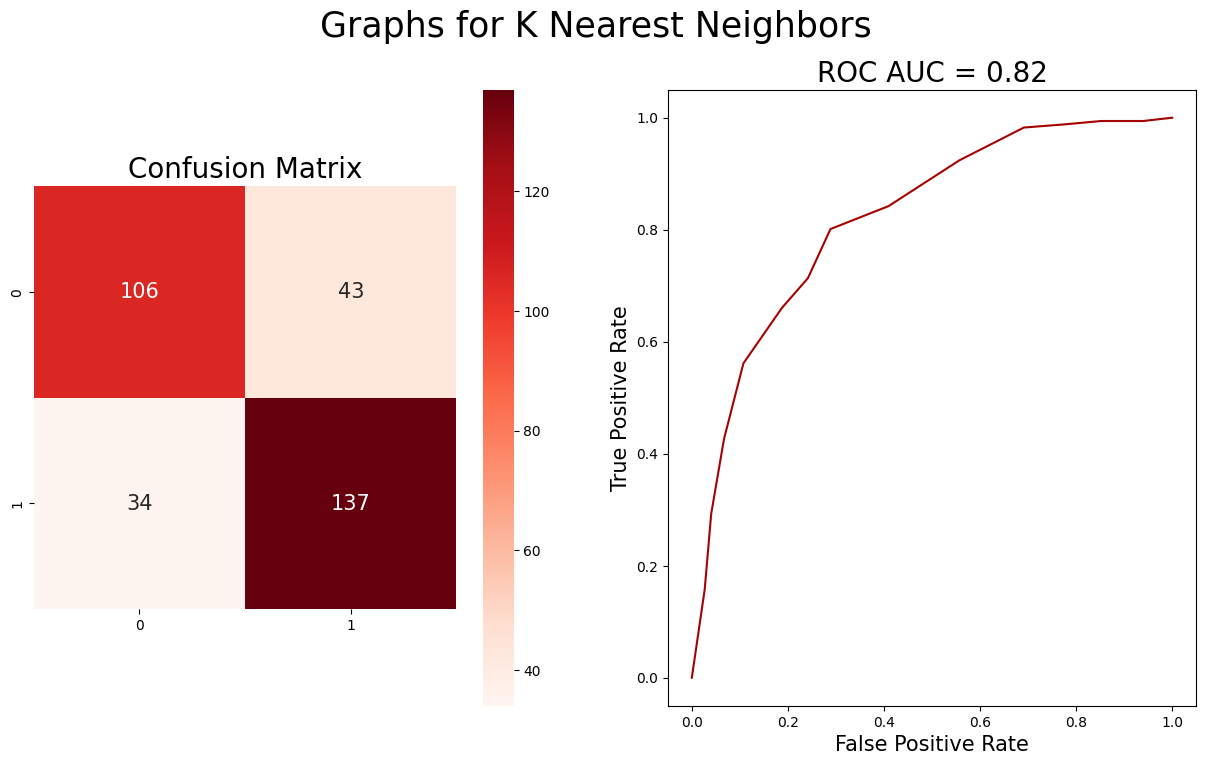

======For Support Vector Classifier======
Training Accuracy: 78.65519937451134%
Testing Accuracy: 79.375%
F1 Score: 0.8047337278106509




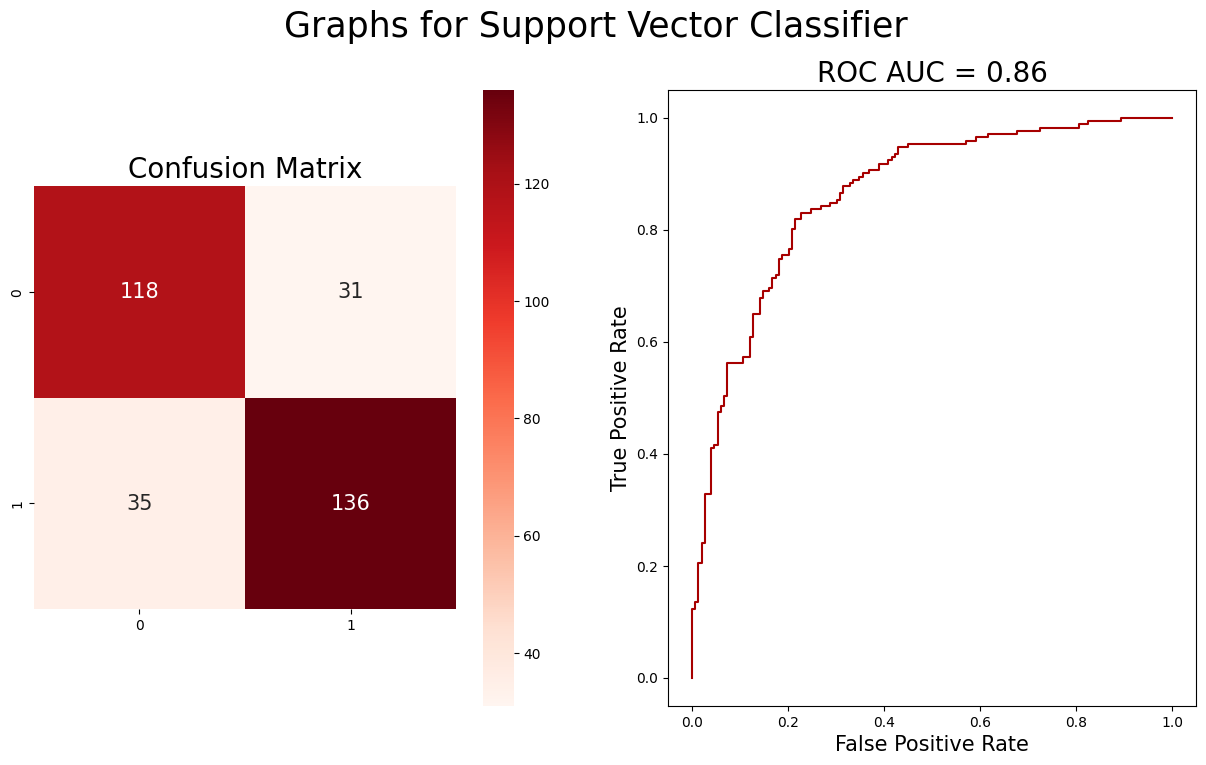

======For Random Forest Classifer======
Training Accuracy: 100.0%
Testing Accuracy: 82.8125%
F1 Score: 0.8387096774193549




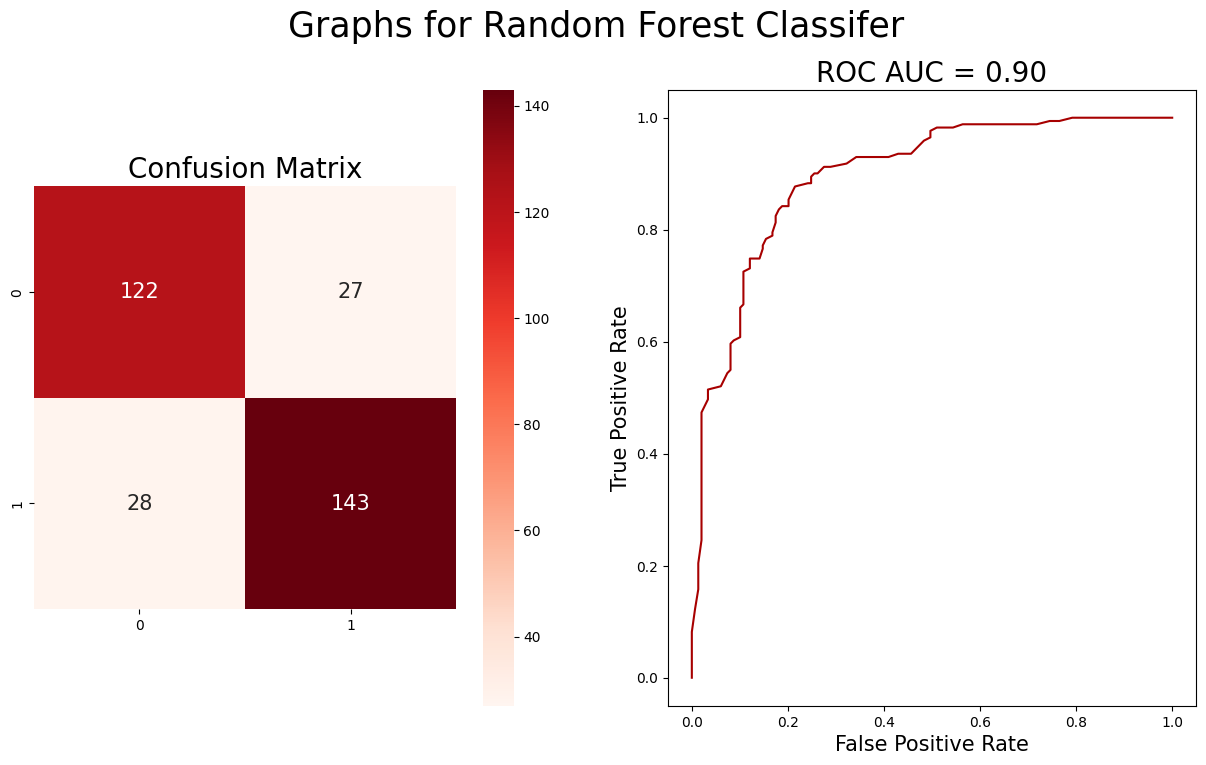

======For Ada Boost Classifier======
Training Accuracy: 78.18608287724786%
Testing Accuracy: 72.8125%
F1 Score: 0.7549295774647887




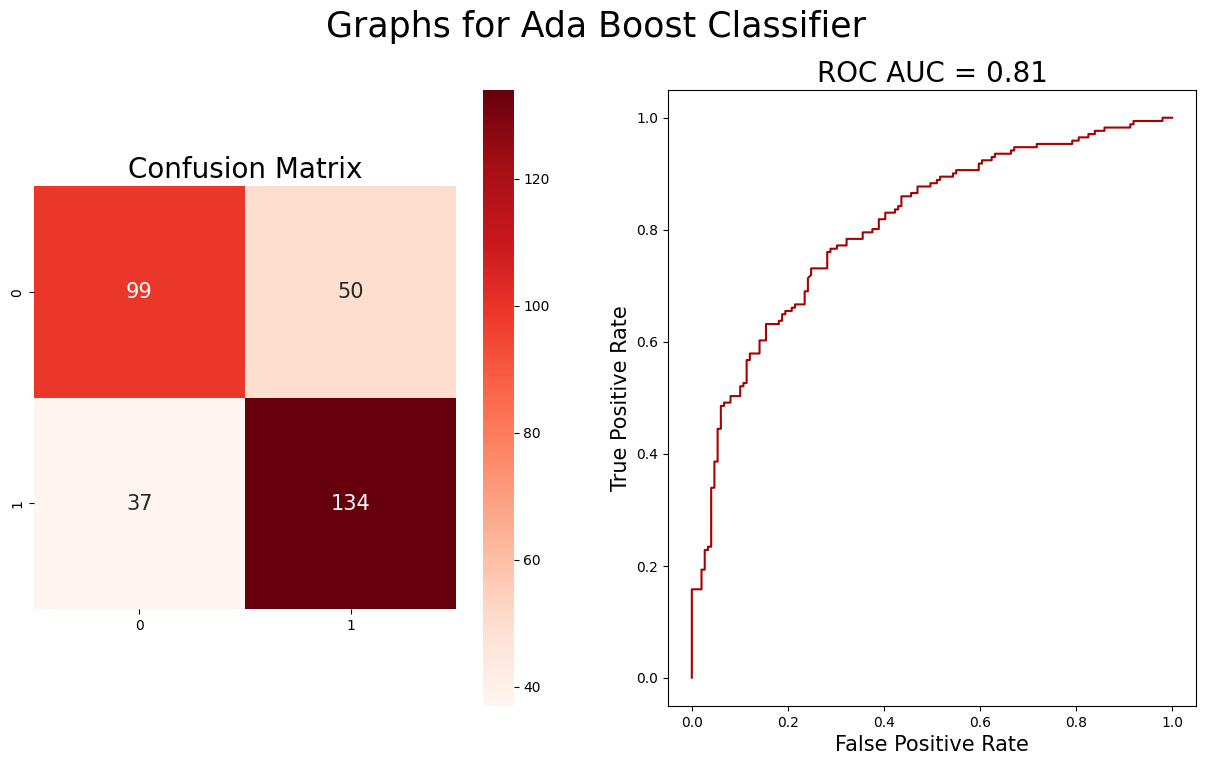

======For XGBoost Classifier======
Training Accuracy: 100.0%
Testing Accuracy: 81.875%
F1 Score: 0.8313953488372092




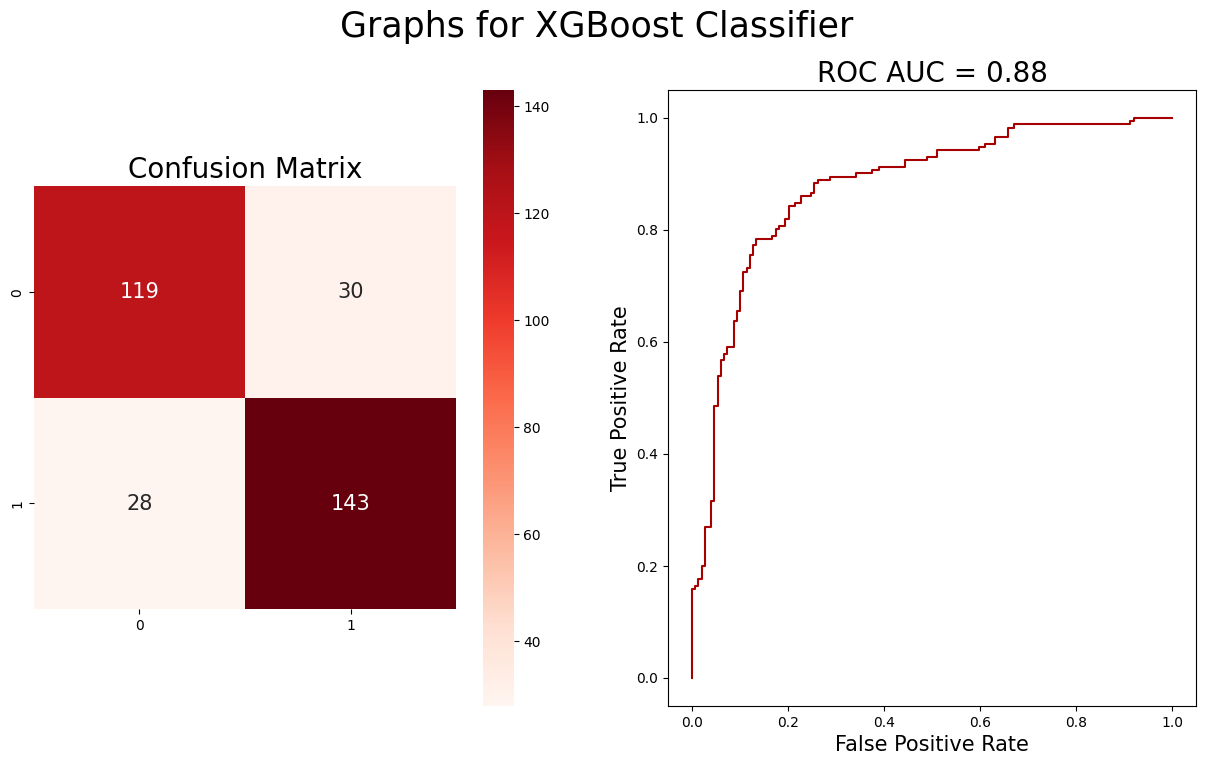

In [ ]:
algo_name = []
accuracy = []

def display_results_and_graphs(algorithm_name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    acc_model = model.score(X_test, y_test)

    algo_name.append(algorithm_name)
    accuracy.append(acc_model)

    print(f'======For {algorithm_name}======')
    print('Training Accuracy: {}%\nTesting Accuracy: {}%\nF1 Score: {}'.
          format((model.score(X_train, y_train) * 100),
                 model.score(X_test, y_test) * 100,
                 f1_score(y_test, y_pred)))
    print('\n')

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    fig.suptitle('Graphs for ' + algorithm_name, fontsize = 25)

    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True,
                cmap = 'Reds', annot_kws = {'size': 15},
                square = True, fmt = '.0f',
                ax = axes[0])
    axes[0].set_title('Confusion Matrix', fontsize = 20)

    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(df['quality'].value_counts())

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr).plot(ax = axes[1])
    axes[1].set_title(f'ROC AUC = {roc:.2f}', fontsize = 20)
    axes[1].set_xlabel('False Positive Rate', fontsize = 15)
    axes[1].set_ylabel('True Positive Rate', fontsize = 15)

    plt.show()

display_results_and_graphs('K Nearest Neighbors', KNeighborsClassifier(n_neighbors = 13))
display_results_and_graphs('Support Vector Classifier', SVC(probability=True))
display_results_and_graphs('Random Forest Classifer', RandomForestClassifier(random_state = 0))
display_results_and_graphs('Ada Boost Classifier', AdaBoostClassifier(random_state = 0))
display_results_and_graphs('XGBoost Classifier', XGBClassifier())

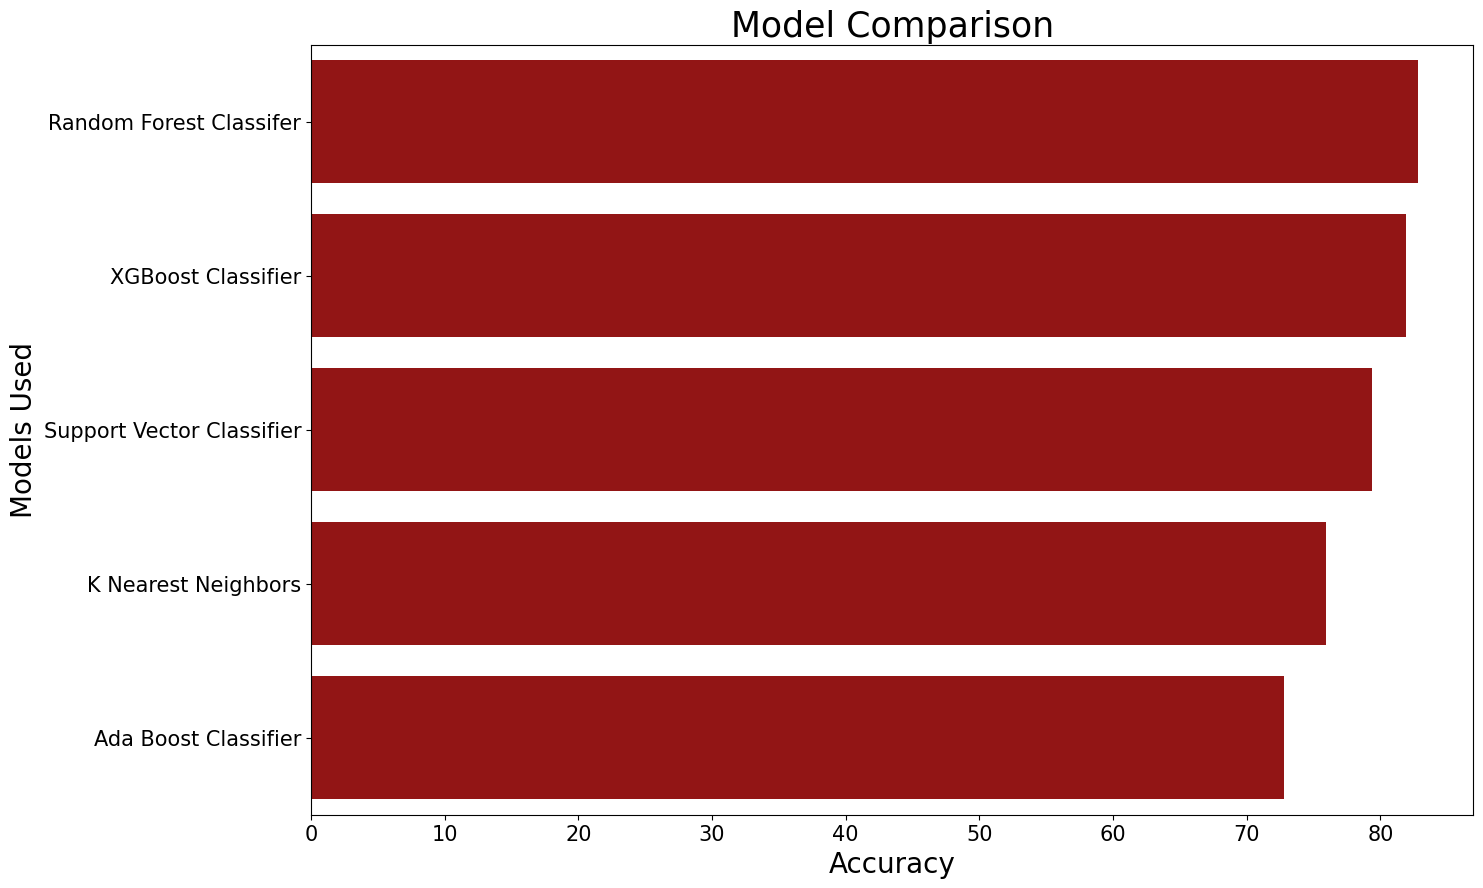

In [ ]:
model_comparison = {}

for k, v in zip(algo_name, accuracy):
    model_comparison.update({k: v * 100})

model_comparison = dict(sorted(model_comparison.items(), key = lambda x: x[1], reverse = True))
models = list(model_comparison.keys())
accuracy = list(model_comparison.values())

plt.figure(figsize = (15, 10))
sns.barplot(x = accuracy, y = models)
plt.title('Model Comparison', fontsize = 25)
plt.xlabel('Accuracy', fontsize = 20)
plt.ylabel('Models Used', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

Hyperparameter Tuning Using Optuna

In [ ]:
def objective(trial):
    param_grid = {
        'tree_method': 'gpu_hist',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [ 0.01, 0.012, 0.015, 0.018, 0.02]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 15]),
        'random_state': 0,
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    model = XGBClassifier(**param_grid)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_model = model.score(X_test, y_test)

    return acc_model

#study = optuna.create_study(direction = 'maximize')
#study.optimize(objective, n_trials = 300)

In [ ]:
print('Number of finished trials:', len(study.trials))
print('Best Parameters:', study.best_trial.params)
print('Improvement in XGBClassifier Accuracy: {}%'.format((study.best_trial.value * 100) - model_comparison['XGBoost Classifier']))
print('Improvement in XGBClassifier Accuracy: {}%'.format((study.best_trial.value * 100) ))

Number of finished trials: 300
Best Parameters: {'lambda': 0.004477072776538252, 'alpha': 0.0022524522190575788, 'subsample': 0.7, 'learning_rate': 0.012, 'n_estimators': 870, 'max_depth': 15, 'min_child_weight': 1}
Improvement in XGBClassifier Accuracy: 2.1875%
Improvement in XGBClassifier Accuracy: 84.0625%


In [ ]:
from xgboost import XGBClassifier

best_parameters = {
    'reg_lambda': 0.004477072776538252,
    'alpha': 0.0022524522190575788,
    'subsample': 0.7,
    'learning_rate': 0.012,
    'n_estimators': 870,
    'max_depth': 15,
    'min_child_weight': 1
}

xgb = XGBClassifier(
    reg_lambda=best_parameters['reg_lambda'],
    alpha=best_parameters['alpha'],
    subsample=best_parameters['subsample'],
    learning_rate=best_parameters['learning_rate'],
    n_estimators=best_parameters['n_estimators'],
    max_depth=best_parameters['max_depth'],
    min_child_weight=best_parameters['min_child_weight']
)

In [ ]:
xgb.fit(X_train, y_train)  # Make predictions on the training data y_pred_train = xgb.predict(X_train)


XGBClassifier(alpha=0.0022524522190575788, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.012, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=870, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
import pickle
with open('XGB', 'wb') as files:
    pickle.dump(xgb, files)

xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.0022524522190575788, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.012, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=870, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.52836,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [ ]:
# Example input values
input_values = [7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]

# Convert the input values to a NumPy array and reshape it
input_array = np.array(input_values).reshape(1, -1)

# Make predictions using the trained XGBoost model
prediction = xgb.predict(input_array)

print(f'Predicted Quality for Example Input: {prediction[0]}')

Predicted Quality for Example Input: 1
